In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

` Generate training data from two bivariate Gaussian`

In [27]:
np.random.seed(10)

In [28]:
mean =  .5 * np.random.multivariate_normal(np.array([0,0]),np.identity(2),size=2)
print(mean)

[[ 0.66579325  0.35763949]
 [-0.77270015 -0.00419192]]


**Help func**: used for generating training samples from the given distribution

In [29]:
def generate_tr(size = 100):
    ytr = np.random.choice([0,1], size=size)
    train_0 = np.random.multivariate_normal(mean[0], np.identity(2), size=np.sum(ytr==0))
    train_1 = np.random.multivariate_normal(mean[1], np.identity(2), size=np.sum(ytr==1))
    Xtr = np.ones((size, 2))# variables in R^2 (100,2)
    Xtr[ytr==0] = train_0
    Xtr[ytr==1] = train_1
    return train_0, train_1, Xtr, ytr

Generate for test samples

In [30]:
nx = 50
ny = 50
x = np.linspace(-3.5,3.5, num=nx)
y = np.linspace(-3.5,3.5, num=ny)
xc, yc = np.meshgrid(x, y)
Xte = np.hstack( (xc.reshape((nx * ny,1)), yc.reshape((nx * ny),1)) ) # (2500,2)

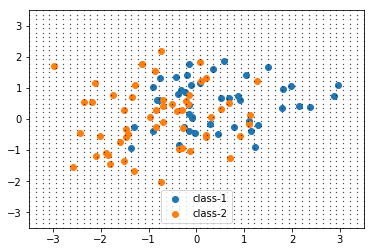

In [34]:
train_1, train_2, Xtr, ytr = generate_tr(100)
plt.scatter(train_1[:,0],train_1[:,1], c='C0', label='class-1')
plt.scatter(train_2[:,0],train_2[:,1], c='C1', label='class-2')
plt.scatter(Xte[:,0], Xte[:,1], s=.1, c='black')
plt.xlim(-3.5, 3.5)
plt.ylim(-3.5, 3.5)
plt.legend()
plt.show()

In [35]:
class KNN(object):
    ## X: training samples (N,P)
    ## y: training label (N,), take value in {0,1}
    def __init__(self):
        pass

    def train(self, X, y):
        self.X = X
        self.y = y
    def predict(self, Xte, K):
        y_pred = np.zeros(len(Xte))
        for i in np.arange(len(Xte)):            
            dist = np.sum( (Xte[i] - self.X)**2 , axis=1) #(M,)
            vote = self.y[dist.argsort()[:K]] #(K,)
            y_pred[i] = (np.sum(vote == 1) > 1/2 * len(vote)) * 1
        return y_pred

In [36]:
knn_classifier = KNN()
knn_classifier.train(Xtr, ytr)

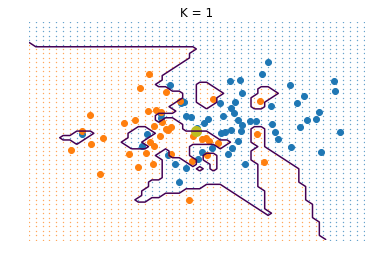

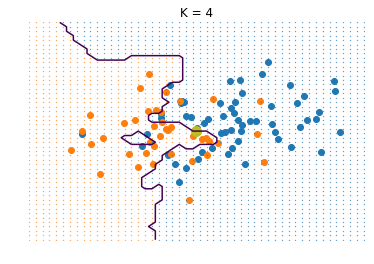

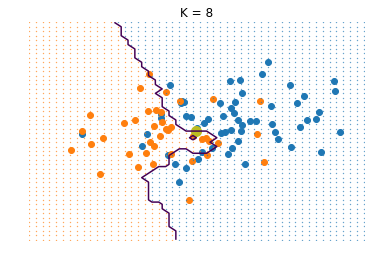

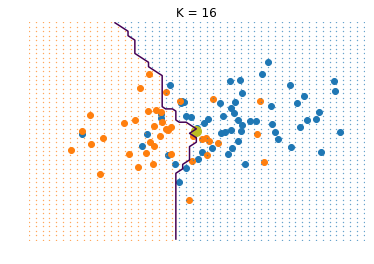

In [61]:
for k in [1,4,8,16] :    
    yte_pred = knn_classifier.predict(Xte, K=k)
    
    plt.scatter(train_1[:,0],train_1[:,1],c='C0', label='class-1')
    plt.scatter(train_2[:,0],train_2[:,1],c='C1', label='class-2')
    plt.scatter(Xte[yte_pred==0,0], Xte[yte_pred==0,1], s=.1, c='C0')
    plt.scatter(Xte[yte_pred==1,0], Xte[yte_pred==1,1], s=.1, c='C1')
    plt.contour(xc, yc, yte_pred.reshape((50,50)),[.5] )
    plt.xlim(-3.5,3.5)
    plt.ylim(-3.5,3.5)
    plt.scatter(0,0,c='C8', s=100)
    plt.title('K = '+ str(k))
    plt.axis('off')
    plt.show()

plt.show()

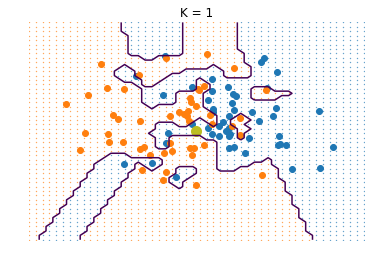

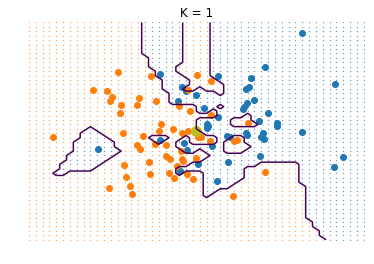

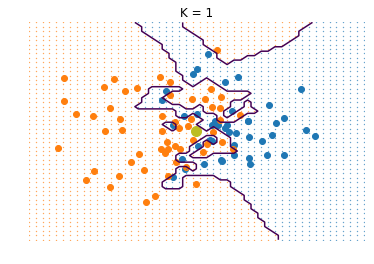

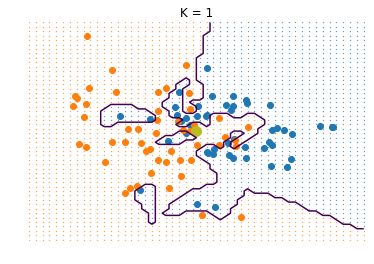

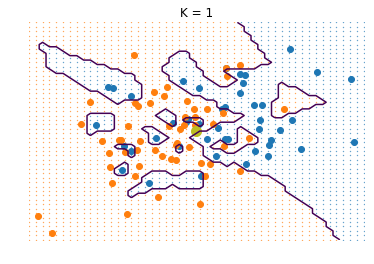

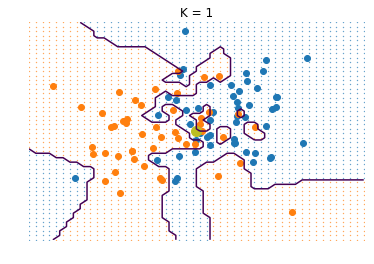

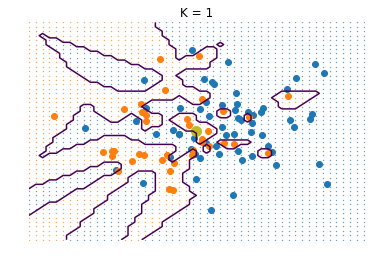

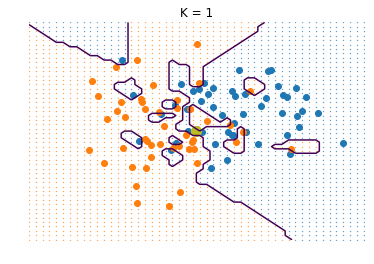

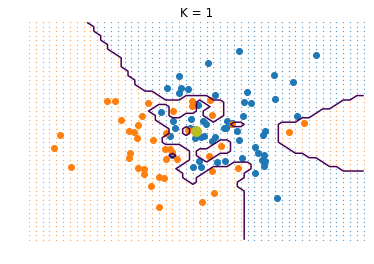

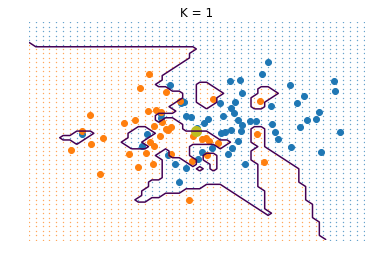

In [60]:
k=1
for n in np.arange(10) :
    knn_classifier = KNN()
    
    train_1, train_2, Xtr, ytr = generate_tr(100)
    knn_classifier.train(Xtr,ytr)
    yte_pred = knn_classifier.predict(Xte, K=k)
    
    plt.scatter(train_1[:,0],train_1[:,1],c='C0', label='class-1')
    plt.scatter(train_2[:,0],train_2[:,1],c='C1', label='class-2')
    plt.scatter(Xte[yte_pred==0,0], Xte[yte_pred==0,1], s=.1, c='C0')
    plt.scatter(Xte[yte_pred==1,0], Xte[yte_pred==1,1], s=.1, c='C1')
    plt.contour(xc, yc, yte_pred.reshape((50,50)),[.5] )
    plt.xlim(-3.5,3.5)
    plt.ylim(-3.5,3.5)
    plt.scatter(0,0,c='C8', s=100)
    plt.title('K = '+ str(k))
    plt.axis('off')
    plt.show()

plt.show()